## Import all the relevant columns


## 🏦 Loan Analysis Problem Statement

# Introduction

When a person applies for a loan, there are two types of decisions that could be taken by the company:

Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). 

Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

# Business Objectives

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who defaultcause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.
If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA and machine learning is the aim of this case study.
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.
To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).


In [127]:
# Import visuals
import seaborn as sns
import matplotlib.pyplot as plt

# Import pandas
import pandas as pd, hvplot.pandas


# Import numpy
import numpy as np
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

# Import statsmodels
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

# Import scipy
from scipy.stats import boxcox
from scipy import stats

# Import Warnings
import warnings
warnings.filterwarnings('ignore')

#increase the number of columns displayed
pd.set_option('display.max_columns',None)

In [129]:
#read the data to check anomaly
df = pd.read_csv("loan_data.csv")
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
df.tail(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/06/13 > I am going to c...,debt_consolidation,Debt consolidation,458xx,OH,25.65,0.0,Dec-01,2.0,65.0,NaN,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.0,0.0,0.0,Jan-16,514.34,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,73598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,Jan-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,913xx,CA,5.39,3.0,Feb-03,1.0,13.0,NaN,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.0,Dec-14,1500.68,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,591610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,D3,NaN,10+ years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/04/13 > I will like a l...,other,Other,950xx,CA,22.78,1.0,Feb-00,0.0,9.0,NaN,6.0,0.0,11325,70.8,22.0,f,3984.38,3974.41,8821.620000,8799.57,6015.62,2806.00,0.0,0.0,0.0,Jan-16,367.58,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,57477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

## Data Profiling

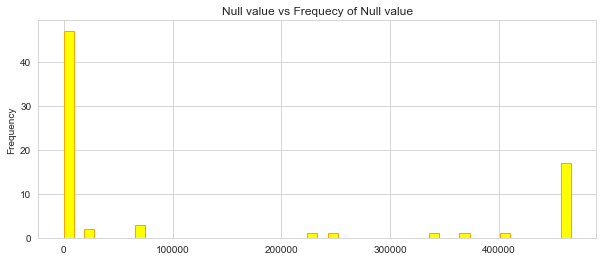

In [132]:
c = df.isnull().sum()
c.plot(kind='hist', bins=50, figsize = (10,4),edgecolor="orange",color='yellow')
plt.title("Null value vs Frequecy of Null value")
plt.show()

Explaination : 

In the above figure, X-axis contains number of NULL values and Y-axis contains number of columns. We can clearly see that there is a huge spike towards the 40K mark. The total records in our data is 39,717. We would obviously not need the columns that have all NULLs. Also, we see there are few columns above 10K mark, but let us analyze those before dropping.

In [133]:
c.loc[(c.values > 10000) & (c.values < 39717)].sort_values()

emp_length    21008
emp_title     27588
dtype: int64

In [134]:
# Let us see if there are any columns with unique or single values in them.
column_unique = df.nunique()
print(column_unique)

id                  466285
member_id           466285
loan_amnt             1352
funded_amnt           1354
funded_amnt_inv       9854
                     ...  
all_util                 0
total_rev_hi_lim     14612
inq_fi                   0
total_cu_tl              0
inq_last_12m             0
Length: 74, dtype: int64


In [135]:
c1 = column_unique[column_unique.values == 1]
df.drop(columns = list(c1.index), inplace=True)
df.shape

(466285, 72)

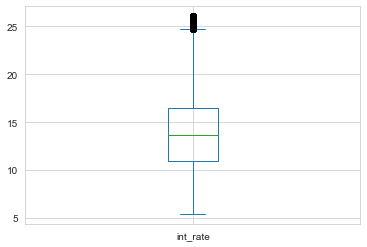

In [136]:
df['int_rate'].plot.box()
plt.show()

Box Plot : we can see some outlier values in int_rate column which needs to analysed when we do univariate analysis

In [63]:
df['title'].value_counts().head()

Debt consolidation         164075
Credit card refinancing     62275
Debt Consolidation          15760
Home improvement            14849
Other                       12713
Name: title, dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [65]:
df['revol_util'].value_counts().head()

0.0     2284
58.0     864
53.0     850
59.0     845
61.0     832
Name: revol_util, dtype: int64

The company wants to know which loan applications are risky. Therefore, the fields that are created after a loan application is approved doesn't make sense for our analysis towards the business objective. Secondly, fields like id, member_id & url are different for each application. zip_code could have been a useful driver, but it contains only partial data which might impute our analysis negatively. Therefore, let us drop all these columns mentioned below

we can actually look at those columns with single value and drop them as they will be no use for our analysis

In [66]:
# #plot the funded amount distribution 
# sns.distplot(df['funded_amnt_inv'], color = 'yellowgreen')
# plt.show();

# #plot the annual income distribution 
# sns.distplot(df['annual_inc'], color = 'darkgreen')
# plt.show();


# #plot the distribution 

# sns.distplot(df['int_rate'], color = 'skyblue')
# plt.show();


# #plot the installment distribution 

# sns.distplot(df['installment'], color = 'Red')
# plt.show();


# #plot the distribution 

# sns.distplot(df['dti'], color = 'Orange')
# plt.show();

Most of the numeric features are normally distributed

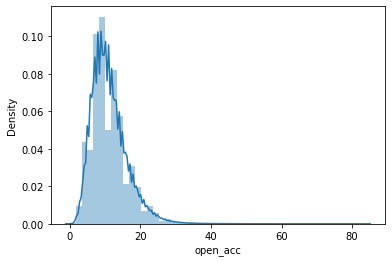

In [67]:
#checking for nulls
df['open_acc'] = df['open_acc'].fillna(df['open_acc'].mean())
sns.distplot(df['open_acc'])
plt.show()

<AxesSubplot:xlabel='total_acc', ylabel='Density'>

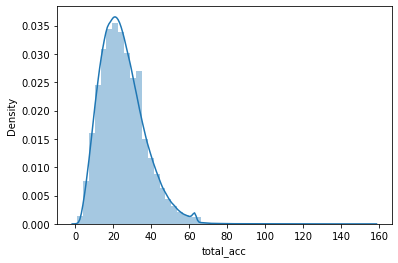

In [68]:
#checking for nulls
df['total_acc']= df['total_acc'].fillna(df['total_acc'].mean())
sns.distplot(df['total_acc'])

<AxesSubplot:xlabel='revol_util', ylabel='Density'>

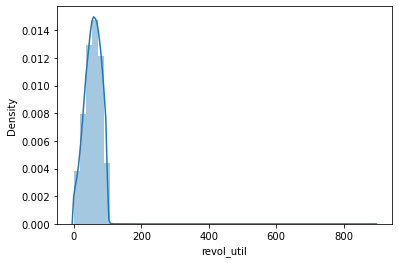

In [69]:
# sns.distplot(df['revol_util'])

df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mean())
sns.distplot(df['revol_util'])

In [70]:
df['revol_util'].isna().any()

False

# Data Cleaning

In [72]:
#Find the counts and percentage of the missing values
df_na = pd.DataFrame({'Percent': 100 * df.isnull().sum()/len(df), 'Count': df.isnull().sum()})

# Print columns with null count > 0
df_na[df_na['Count'] > 0]

,Percent,Count
emp_title,5.916553,27588
emp_length,4.505399,21008
annual_inc,0.000858,4
desc,72.981546,340302
title,0.004289,20
delinq_2yrs,0.006219,29
earliest_cr_line,0.006219,29
inq_last_6mths,0.006219,29
mths_since_last_delinq,53.690554,250351
mths_since_last_record,86.566585,403647


Create a new dataframe with 88% retention value

In [73]:
# Get null values for each column
for col in df.columns:
      print("{} : {}".format(col, df[col].isnull().sum()))

id : 0
member_id : 0
loan_amnt : 0
funded_amnt : 0
funded_amnt_inv : 0
term : 0
int_rate : 0
installment : 0
grade : 0
sub_grade : 0
emp_title : 27588
emp_length : 21008
home_ownership : 0
annual_inc : 4
verification_status : 0
issue_d : 0
loan_status : 0
pymnt_plan : 0
url : 0
desc : 340302
purpose : 0
title : 20
zip_code : 0
addr_state : 0
dti : 0
delinq_2yrs : 29
earliest_cr_line : 29
inq_last_6mths : 29
mths_since_last_delinq : 250351
mths_since_last_record : 403647
open_acc : 0
pub_rec : 29
revol_bal : 0
revol_util : 0
total_acc : 0
initial_list_status : 0
out_prncp : 0
out_prncp_inv : 0
total_pymnt : 0
total_pymnt_inv : 0
total_rec_prncp : 0
total_rec_int : 0
total_rec_late_fee : 0
recoveries : 0
collection_recovery_fee : 0
last_pymnt_d : 376
last_pymnt_amnt : 0
next_pymnt_d : 227214
last_credit_pull_d : 42
collections_12_mths_ex_med : 145
mths_since_last_major_derog : 367311
annual_inc_joint : 466285
dti_joint : 466285
verification_status_joint : 466285
acc_now_delinq : 29
tot_c

In [74]:
# df = pd.read_csv('loan_data.csv')

In [137]:
# Create a new Dataframe that includes valuable columns for prediction
df = df.filter(['emp_title', 'member_id', 'title',
                'open_acc',
                'total_acc',
                'revol_util',
                'loan_amnt',
                'term',
                'int_rate',
                'installment',
                'grade',
                'sub_grade',
                'emp_length',
                'home_ownership', 
                'issue_d', 
                'pymnt_plan',
                'verification_status',
                'purpose',
                'dti',
                'delinq_2yrs',
                'loan_status', 
                'zip_code', 
                'avg_cur_bal', 
                'revol_bal', 
                'addr_state', 
                'annual_inc',
               'pub_rec', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record'])
df.isna().any()



emp_title                  True
member_id                 False
title                      True
open_acc                   True
total_acc                  True
revol_util                 True
loan_amnt                 False
term                      False
int_rate                  False
installment               False
grade                     False
sub_grade                 False
emp_length                 True
home_ownership            False
issue_d                   False
pymnt_plan                False
verification_status       False
purpose                   False
dti                       False
delinq_2yrs                True
loan_status               False
zip_code                  False
revol_bal                 False
addr_state                False
annual_inc                 True
pub_rec                    True
earliest_cr_line           True
inq_last_6mths             True
mths_since_last_delinq     True
mths_since_last_record     True
dtype: bool

In [138]:
df['emp_length']

0         10+ years
1          < 1 year
2         10+ years
3         10+ years
4            1 year
            ...    
466280      4 years
466281    10+ years
466282      7 years
466283      3 years
466284    10+ years
Name: emp_length, Length: 466285, dtype: object

In [139]:
df['loan_status'].value_counts(dropna=False)

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [140]:
# Only keep the values associated with "Fully Paid" and "Charged Off"
df = df.loc[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

# Drop the null rows since we have sufficient amount of Data
df = df.dropna(axis=0)

# Check for null values
for col in df.columns:
      print("{} : {}".format(col, df[col].isnull().sum()))

emp_title : 0
member_id : 0
title : 0
open_acc : 0
total_acc : 0
revol_util : 0
loan_amnt : 0
term : 0
int_rate : 0
installment : 0
grade : 0
sub_grade : 0
emp_length : 0
home_ownership : 0
issue_d : 0
pymnt_plan : 0
verification_status : 0
purpose : 0
dti : 0
delinq_2yrs : 0
loan_status : 0
zip_code : 0
revol_bal : 0
addr_state : 0
annual_inc : 0
pub_rec : 0
earliest_cr_line : 0
inq_last_6mths : 0
mths_since_last_delinq : 0
mths_since_last_record : 0


In [141]:
df.drop(['issue_d', 'verification_status', 'delinq_2yrs'], axis=1)

,emp_title,member_id,title,open_acc,total_acc,revol_util,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,pymnt_plan,purpose,dti,loan_status,zip_code,revol_bal,addr_state,annual_inc,pub_rec,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record
94,Harris,1303147,Emergency Loan,8.0,26.0,52.4,7000,36 months,11.71,231.54,B,B3,4 years,OWN,n,debt_consolidation,21.01,Fully Paid,329xx,9414,FL,39120.0,1.0,Dec-96,0.0,26.0,33.0
161,Senior Dental Insurance Solutions,1294027,home improvement,6.0,16.0,91.6,15000,36 months,17.27,536.81,D,D3,2 years,MORTGAGE,n,house,3.59,Fully Paid,334xx,4582,FL,44400.0,1.0,Jun-83,0.0,18.0,93.0
253,SCI Mahanoy,1291243,Car Loan,10.0,23.0,43.3,5500,36 months,7.90,172.10,A,A4,10+ years,OWN,n,car,6.65,Fully Paid,187xx,9130,PA,59000.0,1.0,Oct-91,0.0,35.0,52.0
359,st catherine of siena,1298959,pay off my debt,21.0,51.0,50.0,9000,36 months,14.65,310.45,C,C3,4 years,RENT,n,debt_consolidation,17.01,Fully Paid,117xx,10464,NY,45000.0,1.0,Nov-95,1.0,20.0,85.0
382,ECR Inc,1298440,Debt Payment,11.0,25.0,12.4,5600,36 months,10.65,182.42,B,B2,6 years,RENT,n,debt_consolidation,16.36,Fully Paid,950xx,2238,CA,60000.0,1.0,Apr-99,0.0,4.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466195,Registered nurse,11957097,Freedom,7.0,18.0,68.6,10000,36 months,11.99,332.10,B,B3,10+ years,RENT,n,debt_consolidation,4.02,Fully Paid,986xx,8305,WA,80000.0,1.0,Nov-99,0.0,9.0,104.0
466196,Chaplain,11927030,Home improvement,8.0,24.0,44.7,16800,60 months,16.24,410.69,C,C5,< 1 year,MORTGAGE,n,home_improvement,8.97,Fully Paid,261xx,5459,WV,76000.0,2.0,Jan-72,1.0,30.0,78.0
466239,Human Resources,11639199,Home improvement,13.0,22.0,64.5,7200,36 months,16.24,253.99,C,C5,10+ years,MORTGAGE,n,home_improvement,26.68,Fully Paid,450xx,24910,OH,86000.0,1.0,Jul-93,0.0,52.0,45.0
466259,security guard,10418080,Debt consolidation,9.0,18.0,66.6,18000,36 months,15.61,629.37,C,C4,4 years,RENT,n,debt_consolidation,31.05,Fully Paid,333xx,6126,FL,48000.0,1.0,Apr-85,1.0,24.0,99.0


# Exploratory Data Analysis

loan_status
Charged Off    2218
Fully Paid     9597
Name: loan_status, dtype: int64


<AxesSubplot:xlabel='loan_status'>

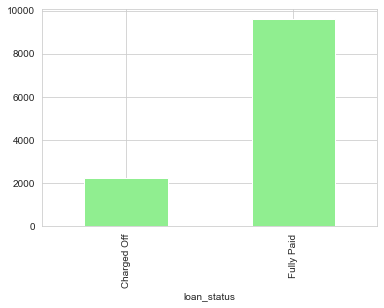

In [142]:
# What is the distribution of loans by status?
loans_by_status = df.groupby('loan_status')
print(loans_by_status['loan_status'].count())
loans_by_status['loan_status'].count().plot(kind='bar', color = 'lightgreen')

purpose
car                    130
credit_card           1958
debt_consolidation    7140
educational             22
home_improvement       932
house                   74
major_purchase         240
medical                156
moving                  80
other                  741
renewable_energy         8
small_business         211
vacation                72
wedding                 51
Name: purpose, dtype: int64


<AxesSubplot:xlabel='purpose'>

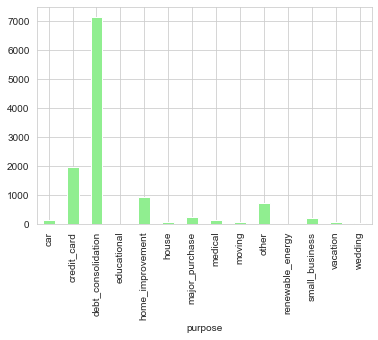

In [143]:
# What is the distribution of loans by purpose?
loans_by_purpose = df.groupby('purpose')
print(loans_by_purpose['purpose'].count())
loans_by_purpose['purpose'].count().plot(kind='bar', color = 'lightgreen')

term
 36 months    9490
 60 months    2325
Name: term, dtype: int64


<AxesSubplot:xlabel='term'>

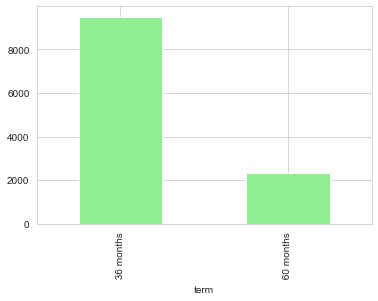

In [144]:
# What is the distribution of loans by term?
loans_by_term = df.groupby('term')
print(loans_by_term['term'].count())
loans_by_term['term'].count().plot(kind='bar', color = 'lightgreen')

Text(0.5, 0, 'Count')

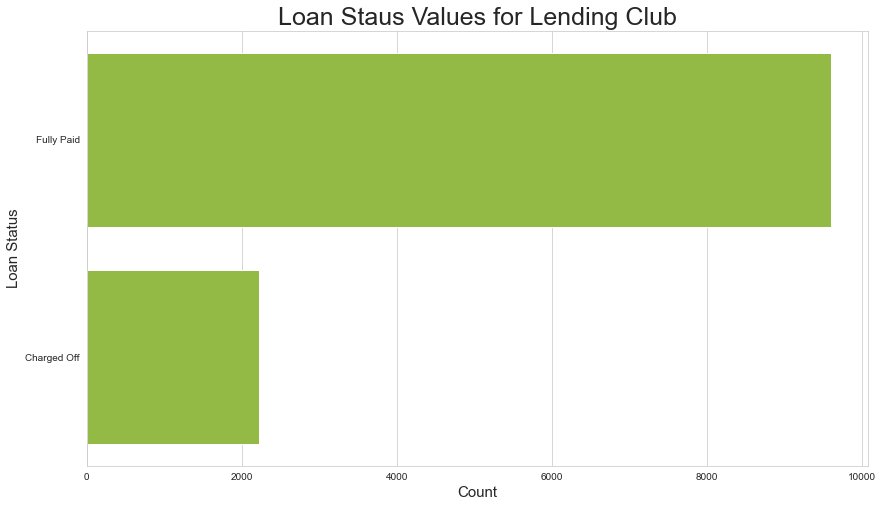

In [145]:
#Plot the value counts
loan = df['loan_status'].value_counts()

plt.figure(figsize=(14,8))
# from jupyterthemes import jtplot
# jtplot.style(theme='solarizedd')
sns.barplot(y = loan.index, x = loan,color = 'yellowgreen')
plt.title('Loan Staus Values for Lending Club',fontsize=25)
plt.ylabel('Loan Status', fontsize=15)
plt.xlabel('Count',fontsize=15)

We see majorly three catagories overrepresenting the home-ownerships - Mortgage, Rent, Own

Text(0.5, 0, 'Count')

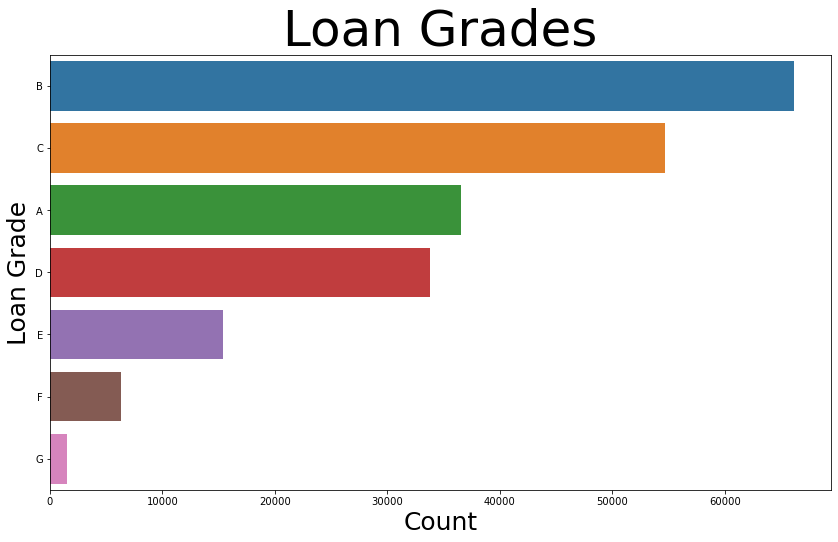

In [84]:
gr = df['grade'].value_counts()
plt.figure(figsize=(14,8))

sns.barplot(y=gr.index, x=gr)
plt.title('Loan Grades', fontsize=50)
plt.ylabel('Loan Grade', fontsize=25)
plt.xlabel('Count', fontsize=25)

In [85]:
df['installment'].isna().any()

False

In [86]:
df['loan_amnt'].isna().any()

False

In [87]:
df['loan_status'] = df.loan_status.map({'Fully Paid':1, 'Charged Off':0})
df.corr()['loan_status'].drop('loan_status').sort_values().hvplot.barh(
    width=600, height=400, 
    title="Correlation between Loan status and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features')

:Bars   [index]   (loan_status)


## Conclusion:
We notice that, there are broadly three types of features:

Features related to the applicant (demographic variables such as occupation, employment details etc.),
Features related to loan characteristics (amount of loan, interest rate, purpose of loan etc.)

In [146]:
installment = df.hvplot.hist(
    y='installment', by='loan_status', subplots=False, 
    width=350, height=400, bins=50, alpha=0.4, 
    title="Installment by Loan Status", 
    xlabel='Installment', ylabel='Counts', legend='top')


loan_amnt = df.hvplot.hist(
    y='loan_amnt', by='loan_status', subplots=False, 
    width=350, height=400, bins=30, alpha=0.4, 
    title="Loan Amount by Loan Status", 
    xlabel='Loan Amount', ylabel='Counts', legend='top')

installment + loan_amnt


:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [installment]   (installment_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [loan_amnt]   (loan_amnt_count)

In [147]:
int_rate = df.hvplot.hist(
    y='int_rate', by='loan_status', alpha=0.3, width=350, height=400,
    title="Loan Status by Interest Rate", xlabel='Interest Rate', ylabel='Loans Counts', 
    legend='top'
)

annual_inc = df.hvplot.hist(
    y='annual_inc', by='loan_status', bins=50, alpha=0.3, width=350, height=400,
    title="Loan Status by Annual Income", xlabel='Annual Income', ylabel='Loans Counts', 
    legend='top'
).opts(xrotation=45)

int_rate + annual_inc

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [int_rate]   (int_rate_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [annual_inc]   (annual_inc_count)

In [148]:
df[df.annual_inc <= 250000].hvplot.hist(
    y='annual_inc', by='loan_status', bins=50, alpha=0.3, width=500, height=400,
    title="Loan Status by Annual Income (<= 250000/Year)", 
    xlabel='Annual Income', ylabel='Loans Counts', legend='top'
).opts(xrotation=45)

:NdOverlay   [loan_status]
   :Histogram   [annual_inc]   (annual_inc_count)

In [149]:
print((df[df.annual_inc >= 250000].shape[0] / df.shape[0]) * 100)
print((df[df.annual_inc >= 1000000].shape[0] / df.shape[0]) * 100)
pd.DataFrame(df.loc[df.annual_inc >= 1000000, 'loan_status'].value_counts())
pd.DataFrame(df.loc[df.annual_inc >= 250000, 'loan_status'].value_counts())

0.7024968260685569
0.008463817181548879


,loan_status
Fully Paid,55
Charged Off,28


In [150]:
df['emp_length']

94          4 years
161         2 years
253       10+ years
359         4 years
382         6 years
            ...    
466195    10+ years
466196     < 1 year
466239    10+ years
466259      4 years
466263    10+ years
Name: emp_length, Length: 11815, dtype: object

- It seems that loans with high intersest rate are more likely to be unpaid.
- Only 75 (less then) borrowers have an annual income more than 1 million, and 4077

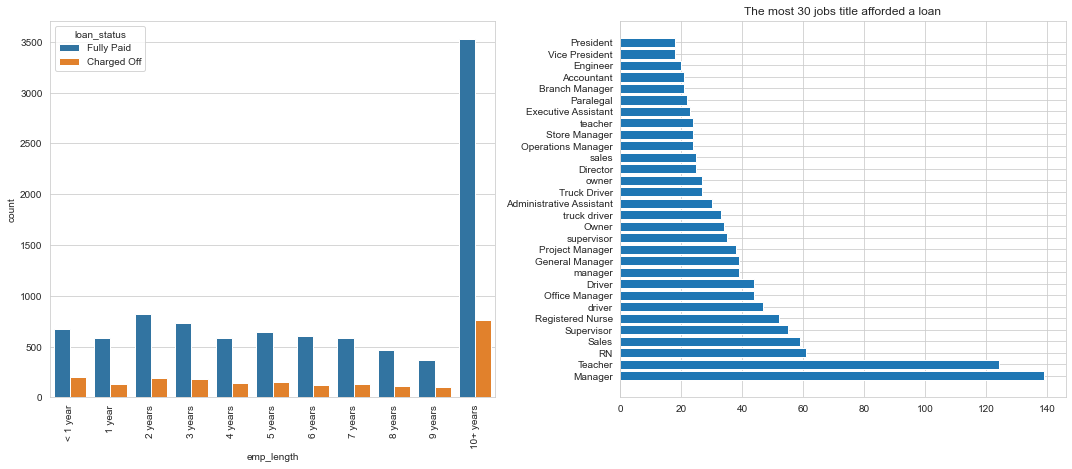

In [151]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years']

g = sns.countplot(x='emp_length', data=df, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(df.emp_title.value_counts()[:30].index, df.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()


- issue_d: The month which the loan was funded
- earliest_cr_line: The month the borrower's earliest reported credit line was opened

In [152]:
print(df[df['dti']>=40].shape)

(0, 30)


In [153]:
df.loc[df['dti'] >= 50, 'loan_status'].value_counts()

Series([], Name: loan_status, dtype: int64)

In [154]:
df['open_acc']

94         8.0
161        6.0
253       10.0
359       21.0
382       11.0
          ... 
466195     7.0
466196     8.0
466239    13.0
466259     9.0
466263     8.0
Name: open_acc, Length: 11815, dtype: float64

In [155]:
dti = df[df['dti']<=50].hvplot.hist(
    y='dti', by='loan_status', bins=50, width=300, height=350, 
    title="dti (<=30) Distribution", xlabel='dti', ylabel='Count', 
    alpha=0.3, legend='top'
)

title="Loan Status by The number of open credit lines"

open_acc = df.hvplot.hist(
    y='open_acc', by='loan_status', bins=50, width=300, height=350, 
    title=title, xlabel='The number of open credit lines', ylabel='Count', 
    alpha=0.4, legend='top'
)

title="Loan Status by The total number of credit lines"

total_acc = df.hvplot.hist(
    y='total_acc', by='loan_status', bins=50, width=300, height=350, 
    title=title, xlabel='The total number of credit lines', ylabel='Count', 
    alpha=0.4, legend='top'
)

dti + open_acc + total_acc

:Layout
   .NdOverlay.I   :NdOverlay   [loan_status]
      :Histogram   [dti]   (dti_count)
   .NdOverlay.II  :NdOverlay   [loan_status]
      :Histogram   [open_acc]   (open_acc_count)
   .NdOverlay.III :NdOverlay   [loan_status]
      :Histogram   [total_acc]   (total_acc_count)

In [156]:
title="Loan Status by Revolving line utilization rate"

revol_util = df.hvplot.hist(
    y='revol_util', by='loan_status', bins=50, width=350, height=400, 
    title=title, xlabel='Revolving line utilization rate', ylabel='Count', 
    alpha=0.4, legend='top'
)

title="Loan Status by Revolving line utilization rate (<120)"

sub_revol_util = df[df.revol_util < 120].hvplot.hist(
    y='revol_util', by='loan_status', bins=50, width=350, height=400, 
    title=title, xlabel='Revolving line utilization rate', ylabel='Count', 
    shared_axes=False, alpha=0.4, legend='top'
)

revol_util + sub_revol_util

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [revol_util]   (revol_util_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [revol_util]   (revol_util_count)

In [157]:
title = "Loan Status by Total credit revolving balance"

revol_bal = df.hvplot.hist(
    y='revol_bal', by='loan_status', bins=50, width=350, height=400, 
    title=title, xlabel='Total credit revolving balance', ylabel='Count', 
    alpha=0.4, legend='top'
)

title = "Loan Status by Total credit revolving balance (<250000)"

sub_revol_bal = df[df['revol_bal']<=250000].hvplot.hist(
    y='revol_bal', by='loan_status', bins=50, width=350, height=400, 
    title=title, xlabel='Total credit revolving balance', ylabel='Count', 
    alpha=0.4, legend='top', shared_axes=False
).opts(xrotation=45)

revol_bal + sub_revol_bal

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [revol_bal]   (revol_bal_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [revol_bal]   (revol_bal_count)

- It seems that the smaller the dti the more likely that the loan will not be paid.
- Only 217 borrower have more than 40 open credit lines.
- Only 266 borrower have more than 80 credit line in the borrower credit file.


## Conclusion:
We notice that, there are broadly three types of features:

Features related to the applicant (demographic variables such as occupation, employment details etc.),
Features related to loan characteristics (amount of loan, interest rate, purpose of loan etc.)

In [100]:
df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,39210.0,14706.232466,8354.829410,900.0,8000.0,13000.0,20000.0,35000.0
1,175189.0,13298.434691,7936.848288,500.0,7200.0,12000.0,18000.0,35000.0


In [101]:
print(f"GRADE unique: {df.grade.unique()}")
print(f"SUB_GRADE unique: {df.sub_grade.unique()}")

GRADE unique: ['C' 'A' 'E' 'B' 'D' 'F' 'G']
SUB_GRADE unique: ['C4' 'C1' 'A4' 'E1' 'B5' 'C3' 'B1' 'B2' 'D1' 'A1' 'B3' 'B4' 'C2' 'D2'
 'A5' 'C5' 'A3' 'A2' 'E4' 'D3' 'F2' 'D4' 'F3' 'E3' 'F1' 'D5' 'E5' 'G4'
 'E2' 'G2' 'G1' 'F5' 'F4' 'G5' 'G3']


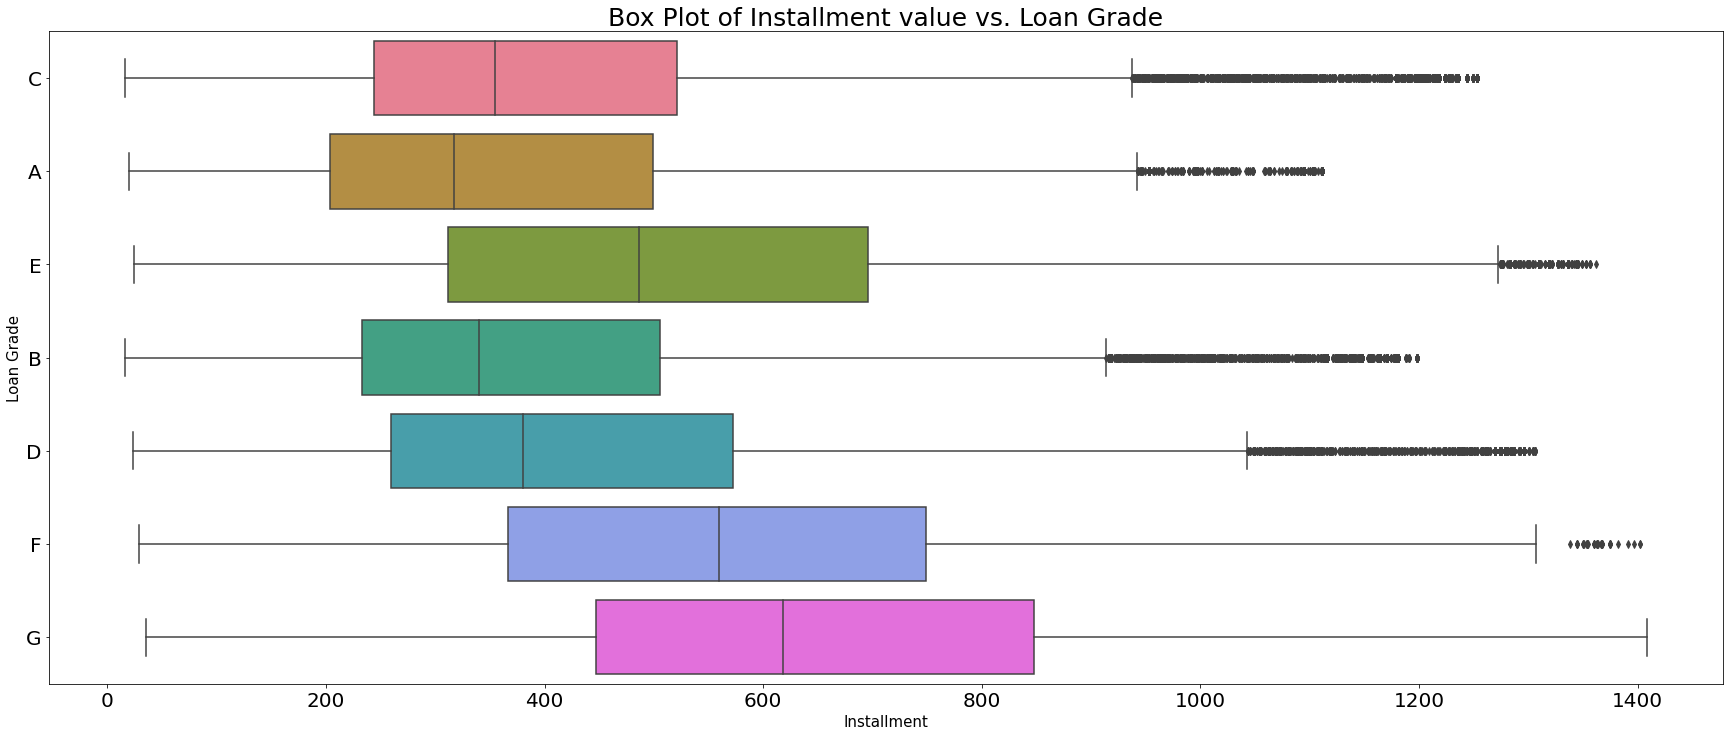

In [102]:
plt.figure(figsize=(30,12))
sns.boxplot(x="installment", y="grade", data=df, palette="husl")
plt.title('Box Plot of Installment value vs. Loan Grade', fontsize=25)
plt.xlabel('Installment', fontsize=15)
plt.ylabel('Loan Grade', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [158]:
# Create a new Dataframe that includes valuable columns for prediction
fully_paid = df.loc[df['loan_status']=='Fully Paid', 'grade'].value_counts().hvplot.bar() 
charged_off = df.loc[df['loan_status']=='Charged Off', 'grade'].value_counts().hvplot.bar() 

(fully_paid * charged_off).opts(
    title="Loan Status by Grade", xlabel='Grades', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right', xrotation=90
)

:Overlay
   .Bars.Grade.I  :Bars   [index]   (grade)
   .Bars.Grade.II :Bars   [index]   (grade)

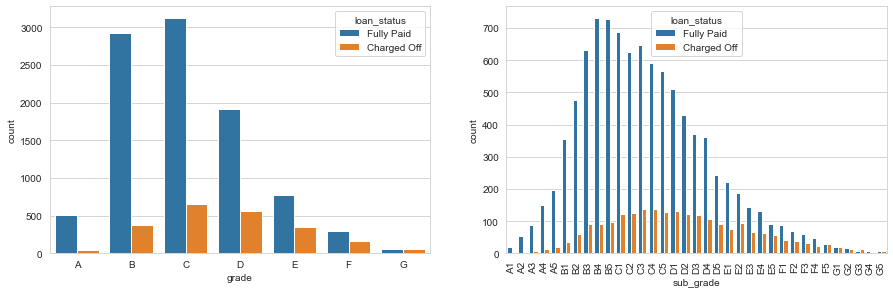

In [159]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

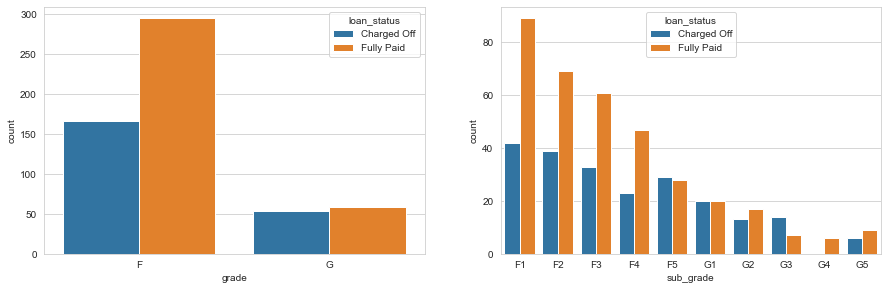

In [160]:
df1 = df[(df.grade == 'F') | (df.grade == 'G')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df1.grade.unique().tolist())
sns.countplot(x='grade', data=df1, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df1.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df1, hue='loan_status', order=sub_grade)

term: The number of payments on the loan. Values are in months and can be either 36 or 60.
home_ownership: The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified
purpose: A category provided by the borrower for the loan request.

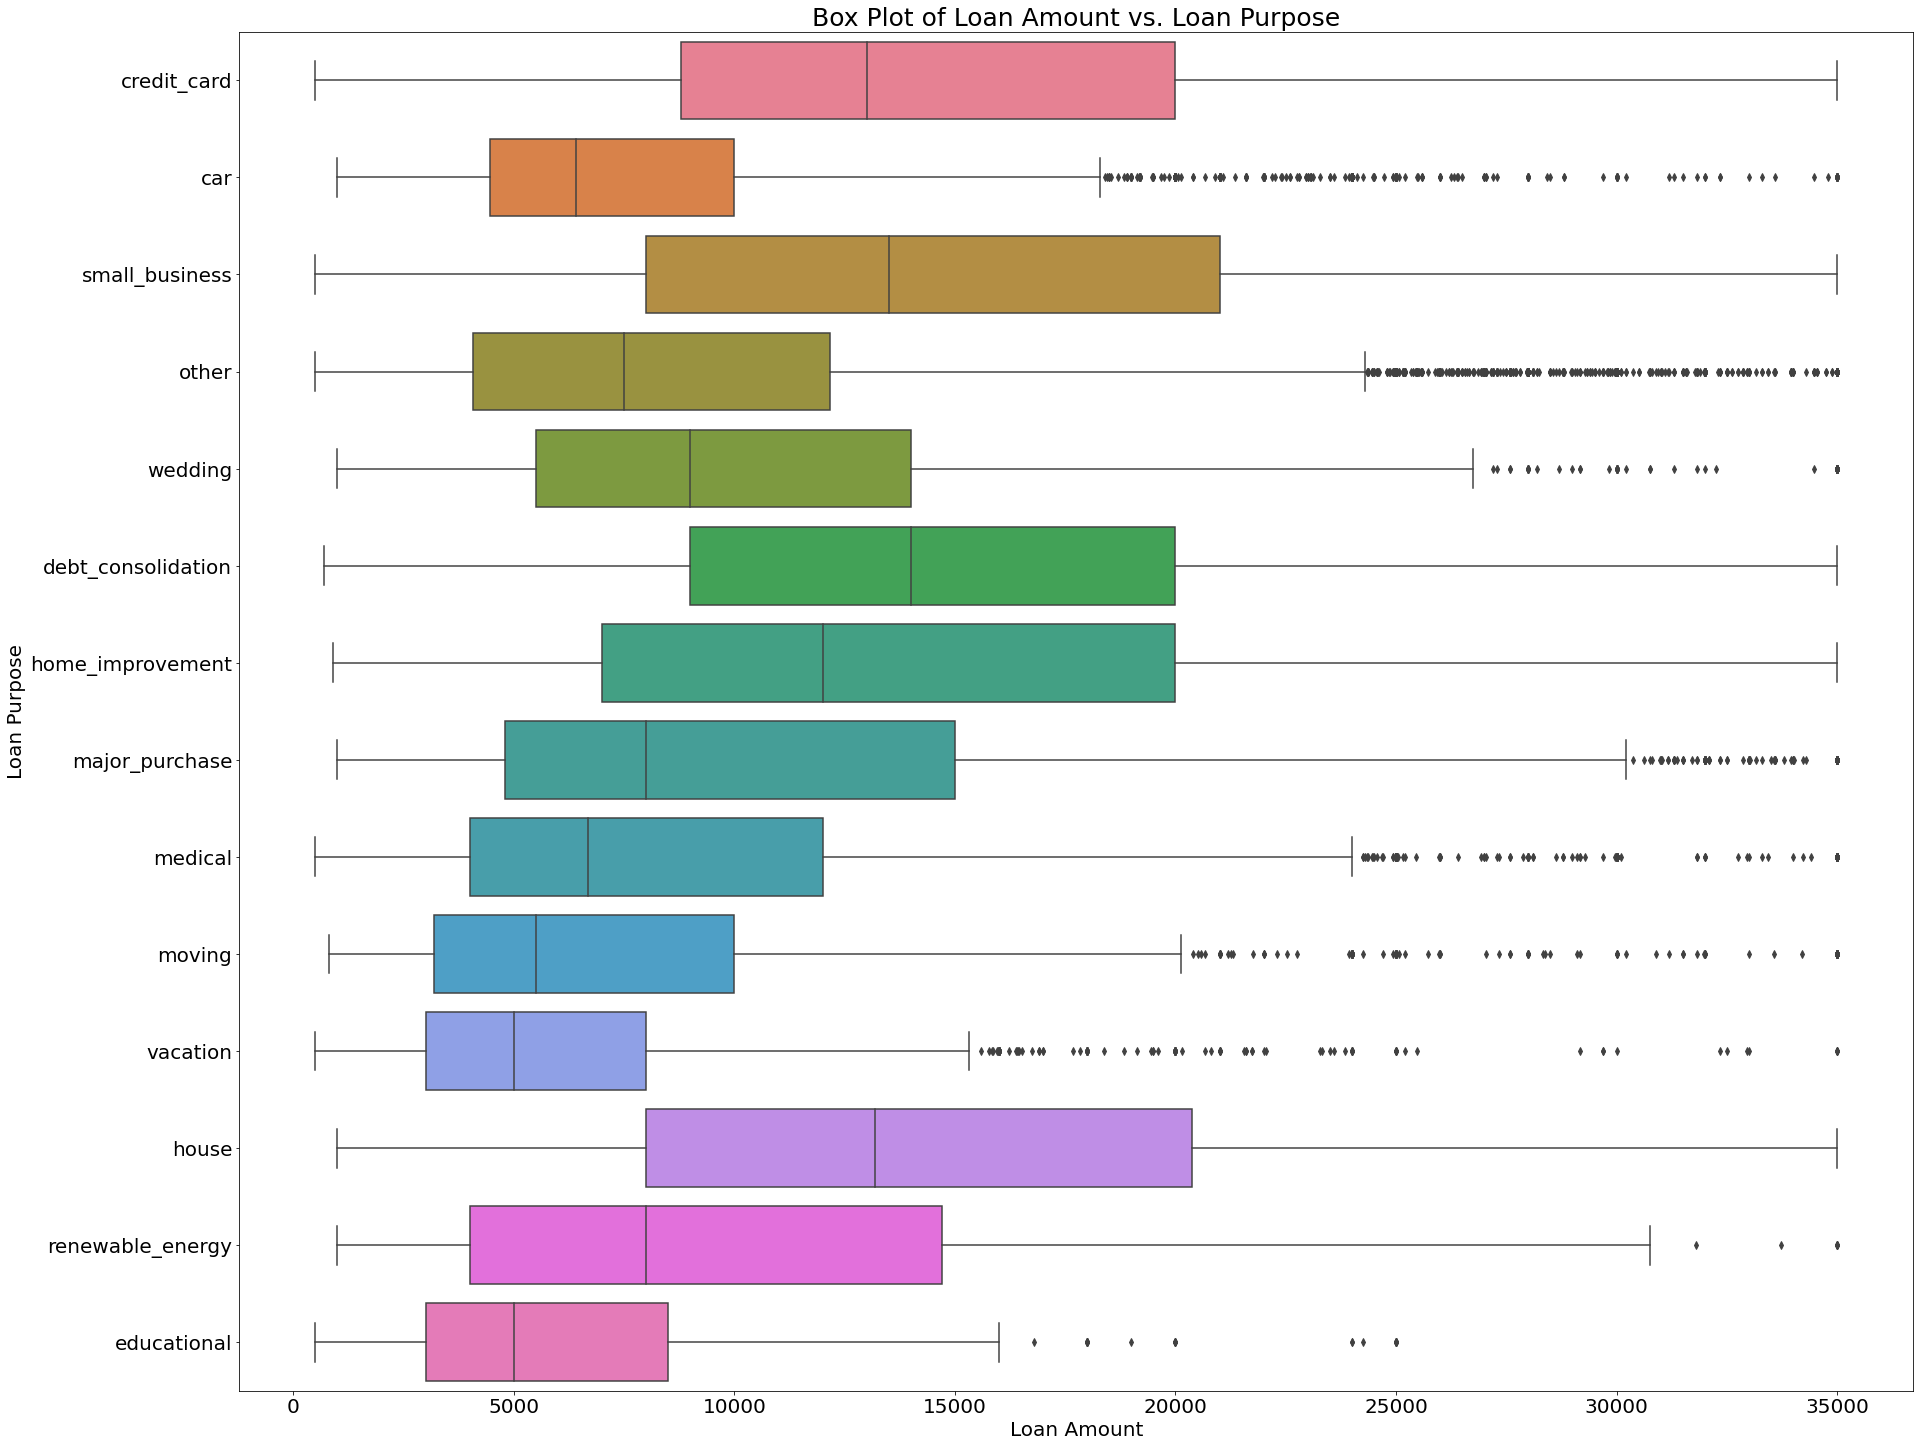

In [107]:
# Plot the borrower's Loan Amount compared to Loan Purpose
df = pd.read_csv('loan_data.csv')
plt.figure(figsize=(30,25))
sns.boxplot(x="loan_amnt", y="purpose", data=df, palette="husl")
plt.title('Box Plot of Loan Amount vs. Loan Purpose', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

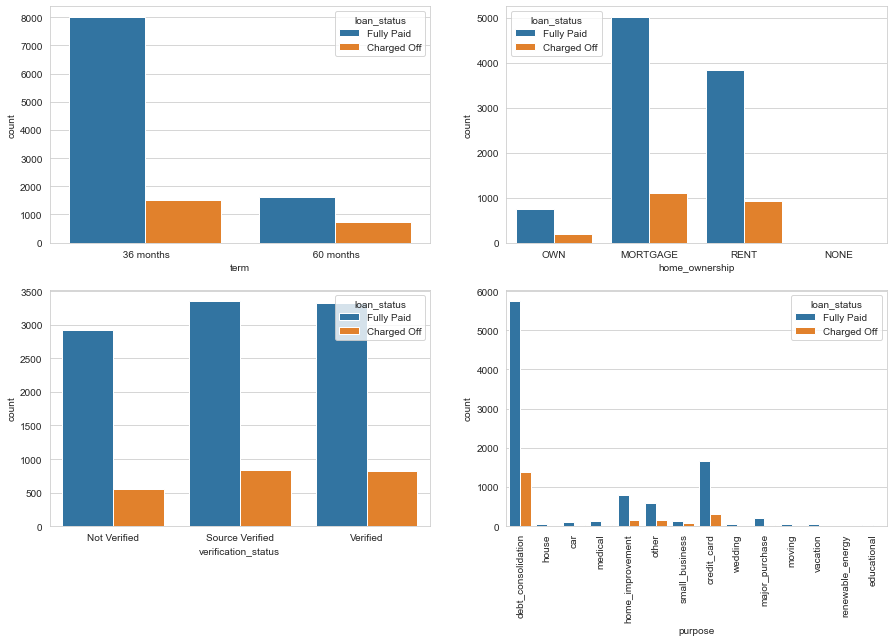

In [161]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=df, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=df, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=df, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=df, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

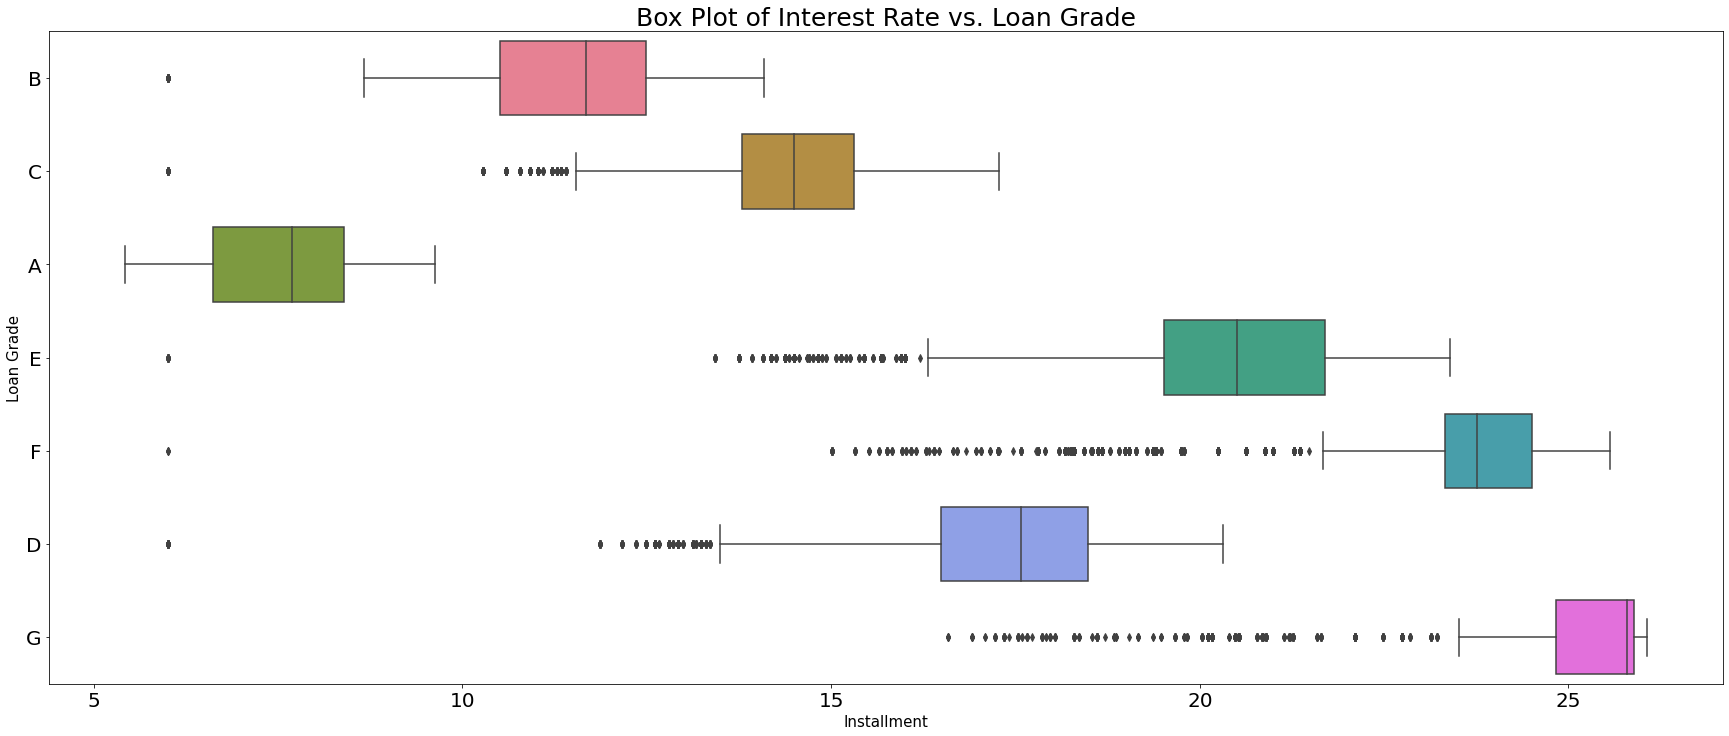

In [109]:
# Plot the borrower's installments compared to load grade
plt.figure(figsize=(30,12))
sns.boxplot(x="int_rate", y="grade", data=df, palette="husl")
plt.title('Box Plot of Interest Rate vs. Loan Grade', fontsize=25)
plt.xlabel('Installment', fontsize=15)
plt.ylabel('Loan Grade', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

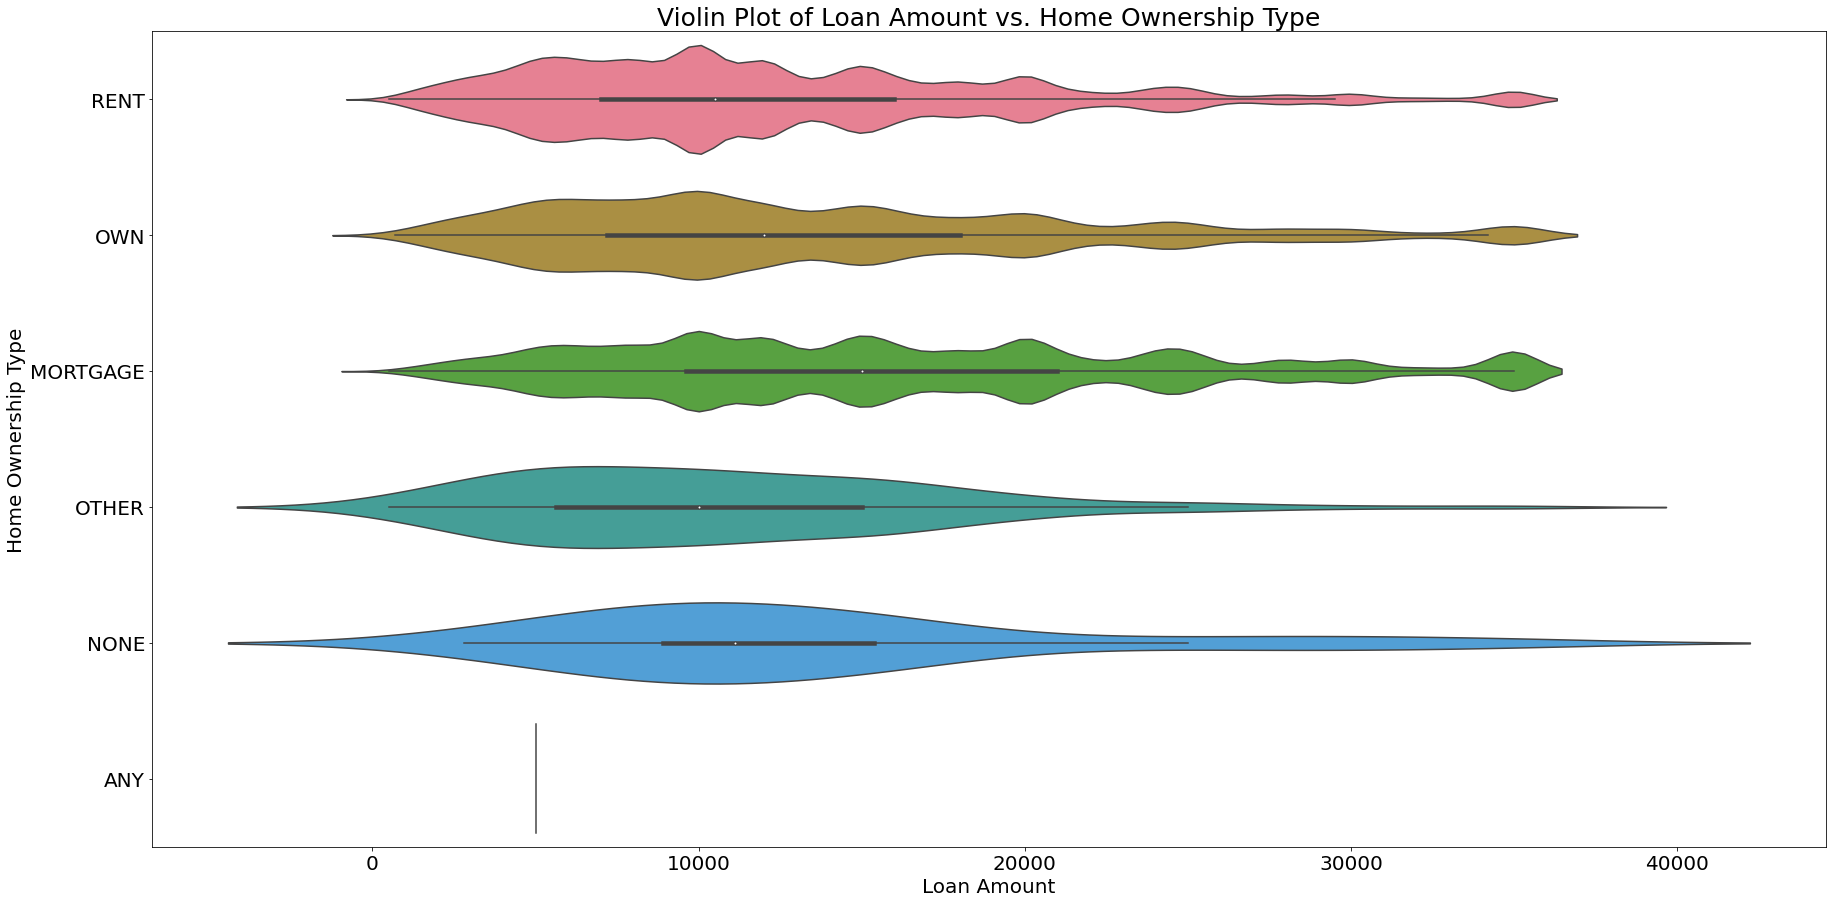

In [110]:
# Plot the borrower's installments compared to load grade
plt.figure(figsize=(30,15))
sns.violinplot(x="loan_amnt", y="home_ownership", data=df, palette="husl")
plt.title('Violin Plot of Loan Amount vs. Home Ownership Type', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Home Ownership Type', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

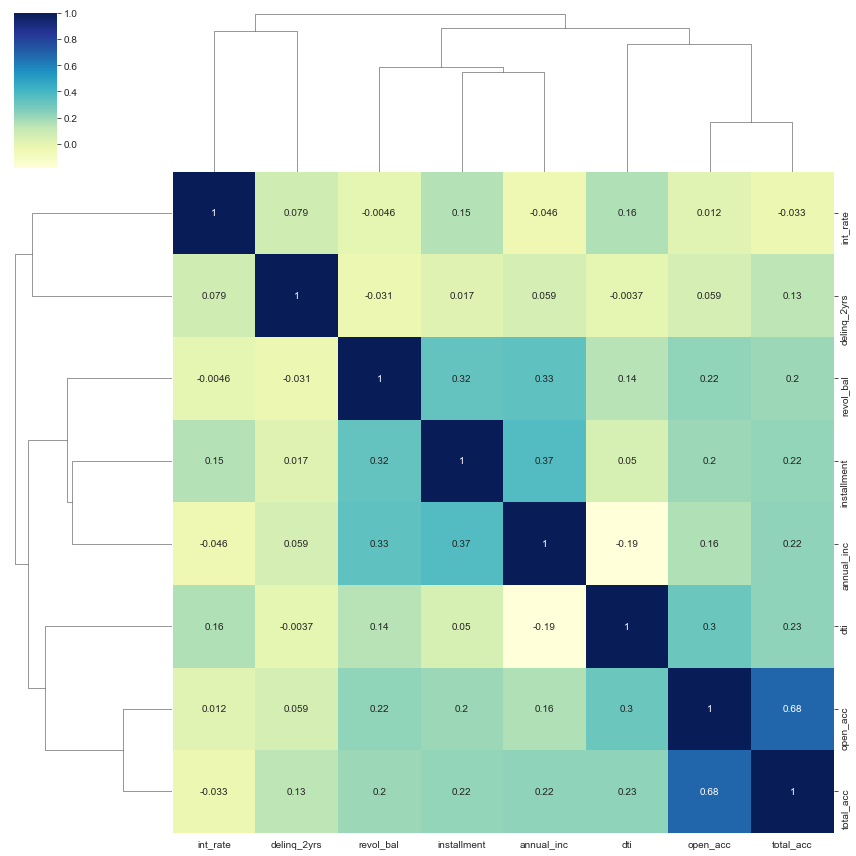

In [112]:
# Create a new Dataframe that includes valuable columns for prediction
sns.set_style("whitegrid")
sns.clustermap(data=df.corr(), cmap='YlGnBu', figsize=(12,12), annot = True)
plt.show()

Since we know darker the value heigher the correlation , we can clearly see loan_amnt, funded_amnt, funded_amnt_inv and installment have huge correlation
 These fields are proportional to each other. Next, the public records related fields pub_rec & pub_rec_bankrupcies and number of accounts related fields open_acc & total_acc are correlated.

In [113]:
country = df['addr_state'].value_counts()

Text(0.5, 0, 'Count')

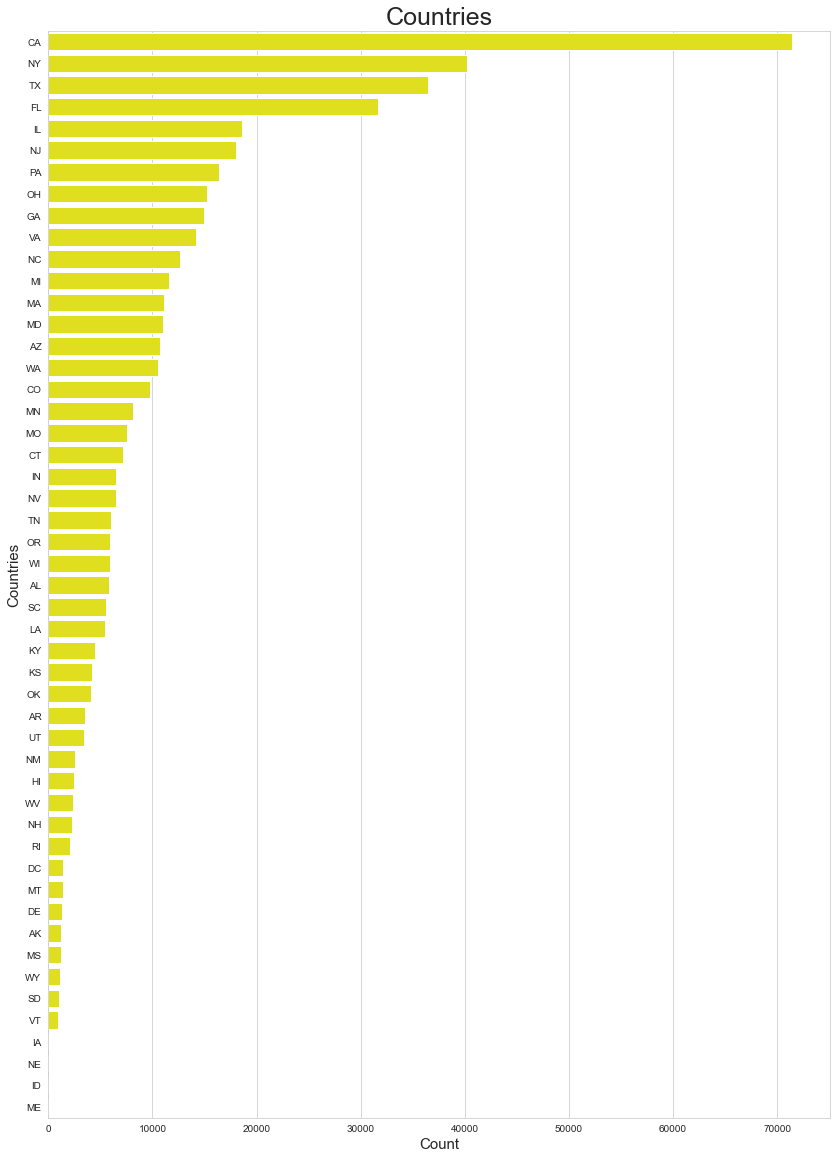

In [114]:
#Plot the value counts
plt.figure(figsize=(14,20))
sns.barplot(y = country.index, x = country,color = 'yellow')
plt.title('Countries',fontsize=25)
plt.ylabel('Countries', fontsize=15)
plt.xlabel('Count',fontsize=15)

<AxesSubplot:>

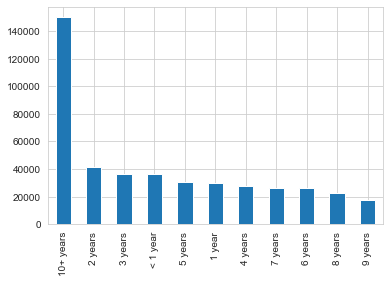

In [115]:
df['emp_length'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

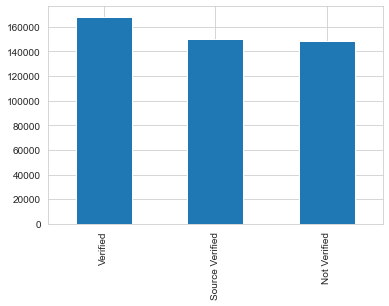

In [116]:
df['verification_status'].value_counts().plot(kind = 'bar')

## Model Preparation

Prepare a train and test split

In [162]:
# Select loans issued within desired date range
range_selected = ('Apr-08', 'Sept-14')
loans_selected = df.loc[(range_selected[0] <= df.issue_d) & (df.issue_d <= range_selected[1])]
print("{num} loans were issued from {range[0]} to {range[1]}".format(num=len(loans_selected), range=range_selected))

# What is their distribution by status?
print(loans_selected.groupby('loan_status')['loan_status'].count())

11815 loans were issued from Apr-08 to Sept-14
loan_status
Charged Off    2218
Fully Paid     9597
Name: loan_status, dtype: int64


In [163]:
# Let's setup a binary classification target 'default': 0 => Fully Paid, 1 => Charged Off
loans_subset = loans_selected.copy()
loans_subset['default'] = None
loans_subset.loc[(loans_subset.loan_status == 'Fully Paid') | (loans_subset.loan_status == 'Does not meet the credit policy. Status:Fully Paid'), 'default'] = 0
loans_subset.loc[(loans_subset.loan_status == 'Charged Off') | (loans_subset.loan_status == 'Does not meet the credit policy. Status:Charged Off'), 'default'] = 1

# Drop loans that haven't been terminated yet (we don't know what their final status will be)
loans_subset = loans_subset[~loans_subset.default.isnull()]
print("Data subset size: {}".format(loans_subset.shape))

# Re-encode 'default' column as numeric (0 or 1)
loans_subset['default'] = pd.to_numeric(loans_subset['default'])

Data subset size: (11815, 31)


In [164]:
# Create a new Dataframe that includes valuable columns for prediction

# Drop columns that are unimportant, superfluous or leak target information
# Note: We only want to keep information that is available at loan *application* stage
application_cols = [
    # Identifiers and dates
    #'id',  # used as index column
    'member_id',
    'issue_d',
    
    # Loan application details
    #'application_type',  # all 'INDIVIDUAL'
    'loan_amnt',  # $ applied for
    'term',  # 36 or 60 months
    'int_rate',  # % annual (?) interest rate
    'installment',  # $ monthly payment
    'emp_title',  # employee/employer title
    'emp_length',  # 0-10+ years
    'home_ownership',  # RENT, OWN, MORTGAGE, etc.
    'verification_status',  # mostly 'Not Verified'
    #'verification_status_joint',  # all 0
    'purpose',  # 'debt_consolidation', 'small_business', etc.
    'title',  # text
    #'desc',  # text, too verbose, may contain updates after application stage
    'zip_code',  # 100XX
    'addr_state',  # covered by zip_code?
    'annual_inc', #'annual_inc_joint',  # income ($; individual only, no joint loans)
    'dti', #'dti_joint',  # debt-to-income ratio (%; individual only, no joint loans)
    'revol_bal', 'revol_util',  # revolving accounts: balance ($), utilization (%)
    'earliest_cr_line', 'total_acc', 'open_acc',  # credit accounts
    'inq_last_6mths', #'inq_last_12m', 'inq_fi',  # credit inquiries (only 6 mths available)
    'delinq_2yrs', 'mths_since_last_delinq', #'acc_now_delinq',  # delinquency (acc_now_delinq is mostly 0)
    'pub_rec', 'mths_since_last_record',
    'default'
]

loans_small = loans_subset[application_cols]

# Check selected data subset
print("Small dataset has {} rows, {} columns:".format(len(loans_small), len(loans_small.columns)))
print(loans_small.head())
print("Class distribution:")
print(loans_small.groupby('default')['default'].count())

Small dataset has 11815 rows, 27 columns:
     member_id issue_d  loan_amnt        term  int_rate  installment  \
94     1303147  Dec-11       7000   36 months     11.71       231.54   
161    1294027  Dec-11      15000   36 months     17.27       536.81   
253    1291243  Dec-11       5500   36 months      7.90       172.10   
359    1298959  Dec-11       9000   36 months     14.65       310.45   
382    1298440  Dec-11       5600   36 months     10.65       182.42   

                             emp_title emp_length home_ownership  \
94                              Harris    4 years            OWN   
161  Senior Dental Insurance Solutions    2 years       MORTGAGE   
253                        SCI Mahanoy  10+ years            OWN   
359              st catherine of siena    4 years           RENT   
382                            ECR Inc    6 years           RENT   

    verification_status             purpose             title zip_code  \
94         Not Verified  debt_consolidatio

In [165]:
# Write dataset to disk (if you want to save it)
loans_small.to_csv("loans_small.csv")
print("Dataset saved!")

Dataset saved!


In [166]:

# Read back from disk (to skip all previous steps if you've saved it already)
loans_small = pd.read_csv("loans_small.csv", index_col=0, parse_dates=True)
print("Loaded data has {} rows, {} columns:".format(len(loans_small), len(loans_small.columns)))
print(loans_small.head())
print("Class distribution:")
print(loans_small.groupby('default')['default'].count())

Loaded data has 11815 rows, 27 columns:
     member_id issue_d  loan_amnt        term  int_rate  installment  \
94     1303147  Dec-11       7000   36 months     11.71       231.54   
161    1294027  Dec-11      15000   36 months     17.27       536.81   
253    1291243  Dec-11       5500   36 months      7.90       172.10   
359    1298959  Dec-11       9000   36 months     14.65       310.45   
382    1298440  Dec-11       5600   36 months     10.65       182.42   

                             emp_title emp_length home_ownership  \
94                              Harris    4 years            OWN   
161  Senior Dental Insurance Solutions    2 years       MORTGAGE   
253                        SCI Mahanoy  10+ years            OWN   
359              st catherine of siena    4 years           RENT   
382                            ECR Inc    6 years           RENT   

    verification_status             purpose             title zip_code  \
94         Not Verified  debt_consolidation 

In [167]:
# Specify a subset of feature columns and a target to predict ('default')
feature_cols = [
    'loan_amnt', 'term', 'int_rate', 'installment', 'purpose',
    'emp_length', 'home_ownership',
    'annual_inc', 'dti',
    'revol_bal', 'revol_util',
    'verification_status']

In [168]:
target_col = 'default'

In [169]:
# Create the final dataset we'll use for classification
keep_cols = feature_cols + [target_col]
loans_final = loans_small[keep_cols]

In [170]:
# Drop samples with null values (few enough that we can ignore)
loans_final.dropna(inplace=True)

In [171]:
print("Final dataset: {} features, {} samples".format(len(loans_final.columns), len(loans_final)))
print(loans_final.head())
print("Final class distribution (after dropping nulls):")

Final dataset: 13 features, 11815 samples
     loan_amnt        term  int_rate  installment             purpose  \
94        7000   36 months     11.71       231.54  debt_consolidation   
161      15000   36 months     17.27       536.81               house   
253       5500   36 months      7.90       172.10                 car   
359       9000   36 months     14.65       310.45  debt_consolidation   
382       5600   36 months     10.65       182.42  debt_consolidation   

    emp_length home_ownership  annual_inc    dti  revol_bal  revol_util  \
94     4 years            OWN     39120.0  21.01       9414        52.4   
161    2 years       MORTGAGE     44400.0   3.59       4582        91.6   
253  10+ years            OWN     59000.0   6.65       9130        43.3   
359    4 years           RENT     45000.0  17.01      10464        50.0   
382    6 years           RENT     60000.0  16.36       2238        12.4   

    verification_status  default  
94         Not Verified        0 

In [172]:
# Extract desired features and target column
X = loans_final[feature_cols]
y = loans_final[target_col]
print("{} features: {}".format(len(X.columns), X.columns))
print("Target: {}".format(y.name))

12 features: Index(['loan_amnt', 'term', 'int_rate', 'installment', 'purpose', 'emp_length',
       'home_ownership', 'annual_inc', 'dti', 'revol_bal', 'revol_util',
       'verification_status'],
      dtype='object')
Target: default


In [173]:
# Encode categorical variables among features
categorical_vars = ['home_ownership', 'purpose', 'verification_status', 'term', 'emp_length']
X = pd.get_dummies(X, columns=categorical_vars, drop_first=True)
print("{} features after encoding categorical variables: {}".format(len(X.columns), X.columns))

36 features after encoding categorical variables: Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'revol_bal', 'revol_util', 'home_ownership_NONE', 'home_ownership_OWN',
       'home_ownership_RENT', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding',
       'verification_status_Source Verified', 'verification_status_Verified',
       'term_ 60 months', 'emp_length_10+ years', 'emp_length_2 years',
       'emp_length_3 years', 'emp_length_4 years', 'emp_length_5 years',
       'emp_length_6 years', 'emp_length_7 years', 'emp_length_8 years',
       'emp_length_9 years', 'emp_length_< 1 year'],
      dtype='object')


In [185]:
# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("Training set: {} samples, test set: {} samples".format(len(X_train), len(X_test)))

Training set: 7916 samples, test set: 3899 samples


## Decision Tree Classifier

In [186]:
# Common sklearn imports
from sklearn.metrics import classification_report

# Classify using a Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


# Classify using a Decision Tree
from sklearn.tree import DecisionTreeClassifier
d_clf = DecisionTreeClassifier(random_state=42)
y_pred = train_predict(clf, X_train, X_test, y_train, y_test)
print(classification_report(y_test, y_pred))

# Analyze feature importance
feature_imps = pd.DataFrame({'feature': X_train.columns, 'importance': clf.feature_importances_})
feature_imps.sort_values(by='importance', ascending=False, inplace=True)
print("Top 10 important features:")
print(feature_imps[:10])

Training a DecisionTreeClassifier...
CPU times: user 127 ms, sys: 2.08 ms, total: 129 ms
Wall time: 138 ms
DecisionTreeClassifier(random_state=42)
Predicting test labels...
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3130
           1       0.28      0.28      0.28       769

    accuracy                           0.72      3899
   macro avg       0.55      0.55      0.55      3899
weighted avg       0.72      0.72      0.72      3899

Top 10 important features:
                       feature  importance
4                          dti    0.139569
6                   revol_util    0.135523
1                     int_rate    0.124169
5                    revol_bal    0.120396
2                  installment    0.109214
3                   annual_inc    0.107482
0                    loan_amnt    0.056709
25             term_ 60 months    0.026395
11  purpose_debt_consolidation    0.014550
27          emp_length_2 years    0.013863


## Random Forest Classifier

In [187]:
# Classify using a Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, random_state=42)

# Define a simple train-predict utility function
def train_predict(clf, X_train, X_test, y_train, y_test):
    """Train clf on <X_train, y_train>, predict <X_test, y_test>; return y_pred."""
    print("Training a {}...".format(clf.__class__.__name__))
    %time clf.fit(X_train, y_train)
    print(clf)
    
    print("Predicting test labels...")
    y_pred = clf.predict(X_test)
    return y_pred


# Classify using a Random Forest
from sklearn.ensemble import RandomForestClassifier
r_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_pred = train_predict(clf, X_train, X_test, y_train, y_test)
print(classification_report(y_test, y_pred))

Training a RandomForestClassifier...
CPU times: user 184 ms, sys: 5.84 ms, total: 190 ms
Wall time: 237 ms
RandomForestClassifier(n_estimators=10, random_state=42)
Predicting test labels...
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      3130
           1       0.43      0.07      0.12       769

    accuracy                           0.80      3899
   macro avg       0.62      0.52      0.50      3899
weighted avg       0.74      0.80      0.74      3899



## Gradient Boosting Classifier

In [188]:
# Classify using a Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
g_clf = GradientBoostingClassifier(n_estimators=100, max_depth=1, learning_rate=1.0, random_state=42)
y_pred = train_predict(clf, X_train, X_test, y_train, y_test)
print(classification_report(y_test, y_pred))

Training a RandomForestClassifier...
CPU times: user 170 ms, sys: 5.72 ms, total: 176 ms
Wall time: 185 ms
RandomForestClassifier(n_estimators=10, random_state=42)
Predicting test labels...
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      3130
           1       0.43      0.07      0.12       769

    accuracy                           0.80      3899
   macro avg       0.62      0.52      0.50      3899
weighted avg       0.74      0.80      0.74      3899

